In [14]:
# library("showtext")
library("ggplot2")
library("magrittr")
library("reshape2")
library("ggthemes")
library('dplyr')

# options(repr.plot.width = 3, repr.plot.height = 2.5)

In [30]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
 
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
 
  numPlots = length(plots)
 
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
 
 if (numPlots==1) {
    print(plots[[1]])
 
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
 
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
 
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# 画方块

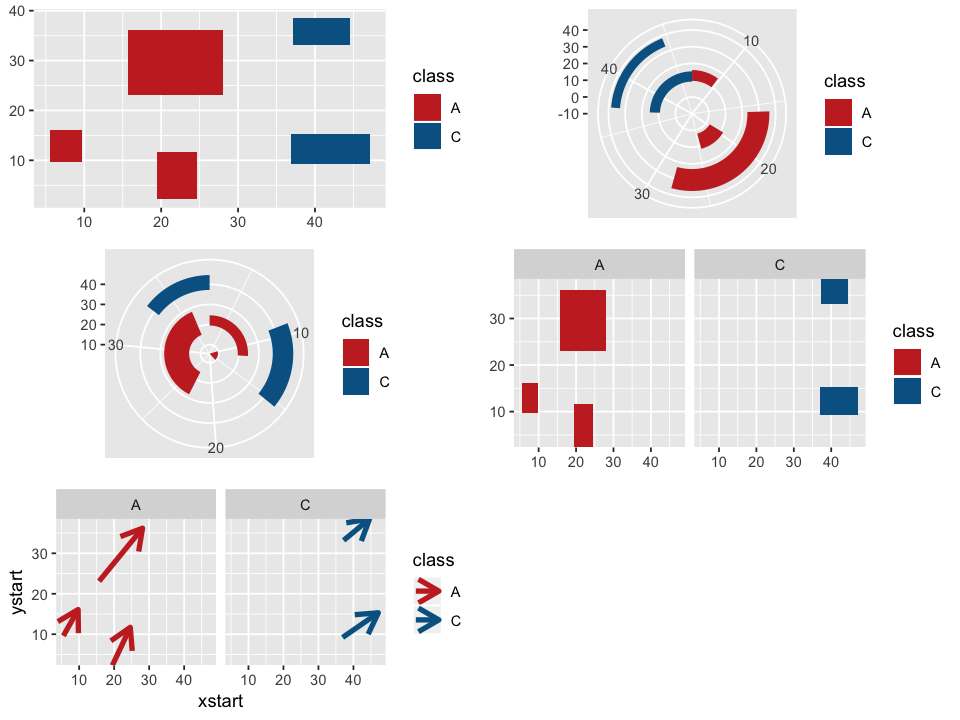

In [37]:

mydata <- data.frame(
  Lebal  = c("Point1","Point2","Point3","Point4","Point5"),
  xstart = c(5.5,15.7,19.5,37.2,36.9),
  xend   = c(9.7,28.1,24.6,44.6,47.1), 
  ystart = c(9.6,23.1,2.3,33.2,9.2),
  yend   = c(16.1,36.2,11.7,38.5,15.3),
  size   = c(12,48,30,11.5,28),
  class  = c("A","A","A","C","C")
)

# geom_rect 画矩形
p1 <- ggplot(mydata)+
  geom_rect(aes(xmin = xstart,xmax = xend , ymin = ystart , ymax = yend , fill = class)) +
  scale_fill_wsj()

# 按照x轴进行圆周化：
p2 <- ggplot(mydata)+
  geom_rect(aes(xmin = xstart,xmax = xend , ymin = ystart , ymax = yend , fill = class)) +
  scale_fill_wsj() +
  ylim(-10,40) +
  scale_x_continuous(expand = c(0,0)) +
  coord_polar(theta = 'x')


#按照y轴进行圆周化
p3 <- ggplot(mydata)+
  geom_rect(aes(xmin = xstart,xmax = xend , ymin = ystart , ymax = yend , fill = class)) +
  scale_fill_wsj() +
  scale_y_continuous(expand = c(0,0)) +
  coord_polar(theta = 'y')


# 分面操作：
p4 <- ggplot(mydata)+
  geom_rect(aes(xmin = xstart,xmax = xend , ymin = ystart , ymax = yend , fill = class)) +
  scale_fill_wsj() +
  facet_grid(.~class) +
  scale_y_continuous(expand = c(0,0))


# 分页箭头
p5 <- ggplot(mydata) +
  geom_segment(
    aes(
      x = xstart , 
      y = ystart , 
      xend = xend ,
      yend = yend  , 
      colour = class
    ),
    arrow = arrow(length = unit(0.5,"cm")),
    size = 1.5
  ) +
  facet_grid(.~class) +
  scale_colour_wsj() +
  scale_y_continuous(expand = c(0,0))

# multiplot(p1, p2, p3, p4, p5, cols=2)


layout <- matrix(c(1:6), ncol=2, byrow=TRUE)
multiplot(p1, p2, p3, p4, p5, layout=layout)



# 垂直线

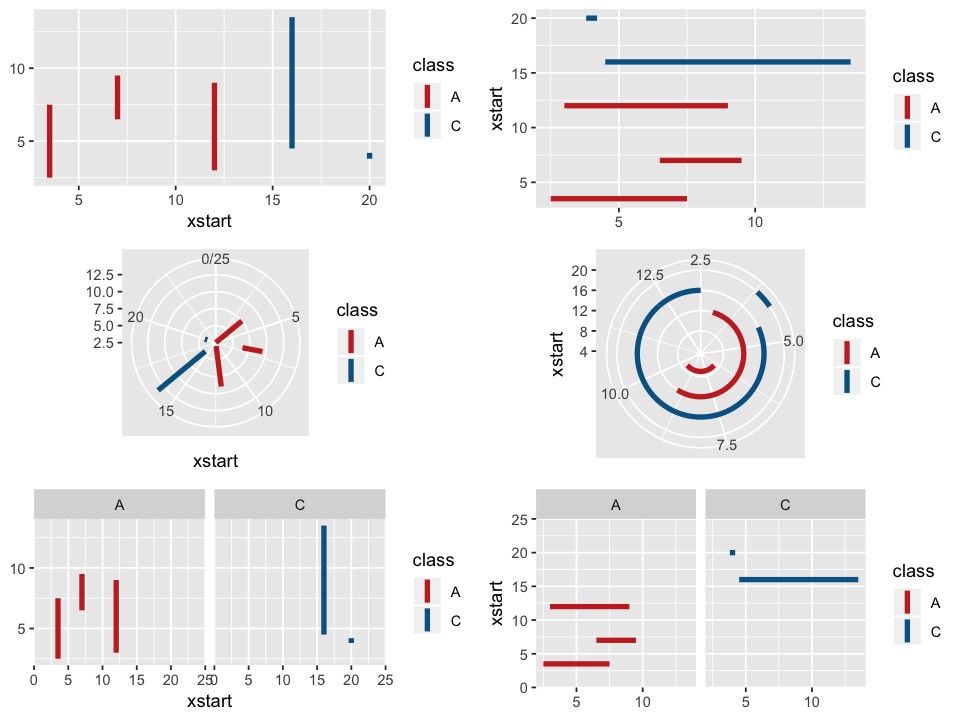

In [38]:

###########
## 绘制垂直线，水平线
mydata <- data.frame(
  Lebal  = c("linerange1","linerange2","linerange3","linerange4","linerange5"),
  xstart = c(3.5,7,12,16,20),
  ymin   = c(2.5,6.5,3,4.5,3.8),
  ymax   = c(7.5,9.5,9,13.5,4.2),
  class  = c("A","A","A","C","C")
)

# 垂直线
p1 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  scale_colour_wsj()

# 横纵轴互换：
p2 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  coord_flip() +
  scale_colour_wsj()

#按x轴圆周化：
p3 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  scale_colour_wsj() +
  scale_x_continuous(limits = c(0,25),expand = c(0,0)) +
  coord_polar(theta = 'x')

#按y轴圆周化：
p4 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  scale_colour_wsj() +
  scale_y_continuous(expand = c(0,0)) +
  coord_polar(theta = 'y')

#分面：
p5 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  scale_colour_wsj() +
  facet_grid(.~class) +
  scale_x_continuous(limits = c(0,25),expand = c(0,0))

p6 <- ggplot(mydata) +
  geom_linerange(aes(x = xstart, ymin = ymin , ymax = ymax , colour = class) , size = 1.5) +
  coord_flip() +
  scale_colour_wsj() +
  facet_grid(.~class) +
  scale_x_continuous(limits = c(0,25),expand = c(0,0))



options(repr.plot.width = 8, repr.plot.height = 6)
# multiplot(p1, p2, p3, p4, p5, p6, cols=2)

layout <- matrix(c(1:6), ncol=2, byrow=TRUE)
multiplot(p1, p2, p3, p4, p5, p6, layout=layout)


# 绘制多边形

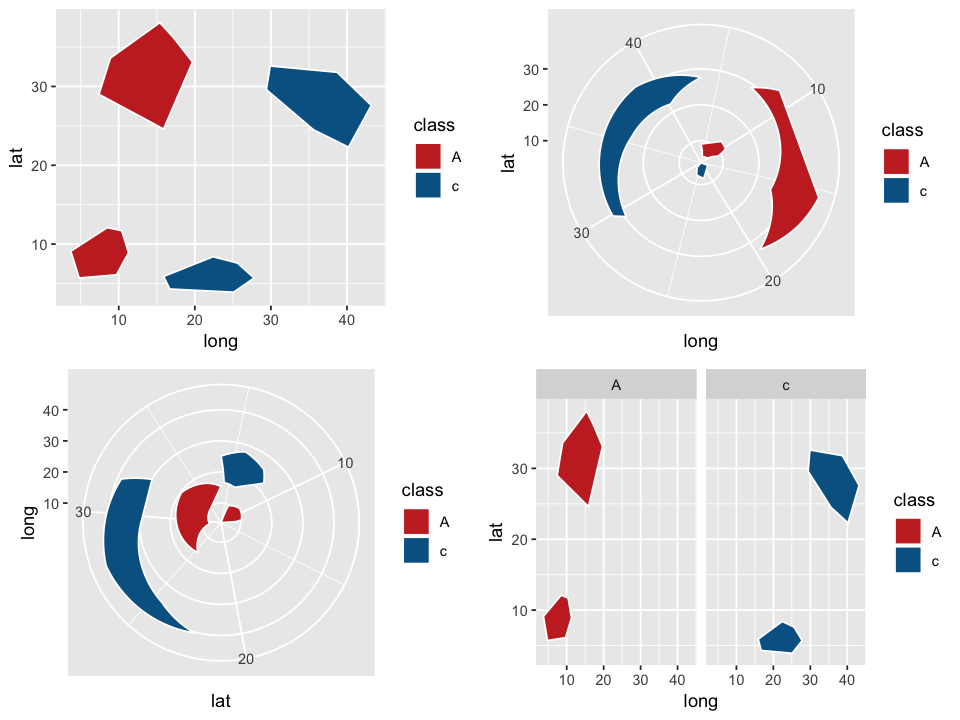

In [40]:

###################
# 绘制多边形
mydata <- data.frame(
  long = c(15.4,17.2,19.7,15.9,7.4,8.9,8.5,10.4,11.3,9.7,4.8,3.7,22.4,25.6,27.8,25.1,16.7,15.9,29.9,38.7,43.2,40.2,35.6,29.4),
  lat  = c(38.1,36.2,33.1,24.6,29.0,33.6,12.1,11.7,8.9,6.1,5.7,9.1,8.4,7.6,5.7,3.9,4.3,5.9,32.6,31.8,27.6,22.3,24.5,29.6),
  group= c(1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4),
  order =c(1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6),
  class = rep(c("A","c"),each = 12)
)

# 多边形
p1 <- ggplot(mydata) +
  geom_polygon(aes(x = long , y = lat , group  = group , fill = class),colour = "white") +
  scale_fill_wsj()

#按照X轴圆周化：
p2 <- ggplot(mydata) +
  geom_polygon(aes(x = long , y = lat , group  = group , fill = class),colour = "white") +
  coord_polar(theta = 'x') +
  scale_x_continuous(expand = c(0,0)) +
  scale_fill_wsj()

#按照y轴圆周化：
p3 <- ggplot(mydata) +
  geom_polygon(aes(x = long , y = lat , group  = group , fill = class),colour = "white") +
  coord_polar(theta = 'y') +
  scale_y_continuous(expand = c(0,0)) +
  scale_fill_wsj()

#分面：
p4 <- ggplot(mydata) +
  geom_polygon(aes(x = long , y = lat , group  = group , fill = class),colour = "white") +
  facet_grid(.~class) +
  scale_fill_wsj()

# multiplot(p1, p2, p3, p4, cols=2)

layout <- matrix(c(1:4), ncol=2, byrow=TRUE)
multiplot(p1, p2, p3, p4, layout=layout)



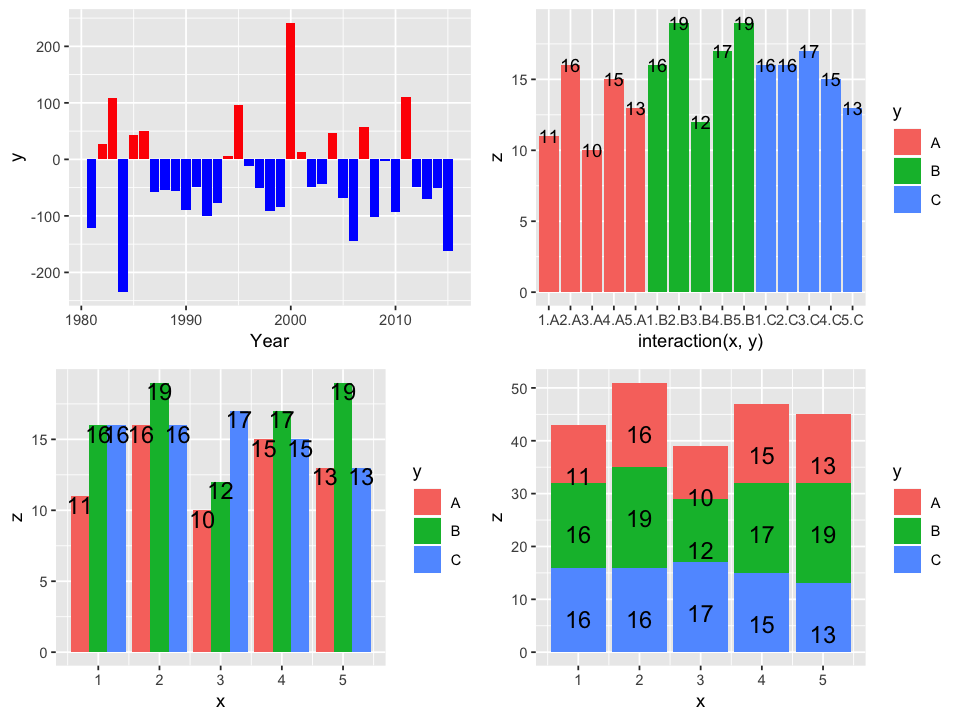

In [43]:

# 正负分开显示
set.seed(1234)
x = 1980 + 1:35
y = round(100*rnorm(35))
df = data.frame(x = x, y = y)
#判断y是否为正值
df <- transform(df, judge = ifelse(y>0, 'Yes', 'No'))
p1 <- ggplot(data = df, mapping = aes(x = x, y = y, fill = judge)) + 
  geom_bar(stat = 'identity', position = 'identity') + 
  scale_fill_manual(values = c('blue','red'), guide = FALSE) + xlab('Year')

# 分类显示，并有数字
x <- rep(1:5, each = 3)
y <- rep(c('A','B','C'),times = 5)
set.seed(1234)
z <- round(runif(min = 10, max = 20, n = 15))
df <- data.frame(x = x, y = y, z = z)
p2 <- ggplot(data = df, mapping = aes(x = interaction(x,y), y = z, fill = y)) + 
  geom_bar(stat = 'identity') + geom_text(mapping = aes(label = z))


p3 <- ggplot(data = df, mapping = aes(x = x, y = z, fill = y)) + 
    geom_bar(stat = 'identity', position = 'dodge') + 
    geom_text(mapping = aes(label = z), size = 5, colour = 'black', vjust = 1, hjust = .5, position = position_dodge(0.9))


p4 <- ggplot(data = df, mapping = aes(x = x, y = z, fill = y)) + 
    geom_bar(stat = 'identity', position = 'stack') + 
    geom_text(mapping = aes(label = z), size = 5, colour = 'black', vjust = 3.5, hjust = .5, position = position_stack())

options(repr.plot.width = 8, repr.plot.height = 6)

layout <- matrix(c(1:4), ncol=2, byrow=TRUE)
multiplot(p1, p2, p3, p4, layout=layout)

# 多图拼接

In [10]:
library("tidyverse")
library("scales")
library("countrycode")
library("ggimage")
library("grid")
library("Rmisc")
# library("showtext")
# library("Cairo")

Loading required package: sysfonts
Error: package or namespace load failed for ‘sysfonts’:
 .onLoad failed in loadNamespace() for 'sysfonts', details:
  call: dyn.load(file, DLLpath = DLLpath, ...)
  error: unable to load shared object '/Library/Frameworks/R.framework/Versions/3.5/Resources/library/sysfonts/libs/sysfonts.so':
  dlopen(/Library/Frameworks/R.framework/Versions/3.5/Resources/library/sysfonts/libs/sysfonts.so, 6): Library not loaded: /opt/X11/lib/libfreetype.6.dylib
  Referenced from: /Library/Frameworks/R.framework/Versions/3.5/Resources/library/sysfonts/libs/sysfonts.so
  Reason: image not found


ERROR: Error: package ‘sysfonts’ could not be loaded


In [4]:
name<-c("司法界","商人","外交领域","军人","记者","经济学家","医学界","学术界","工程师")
label<-factor(name,levels=name,order=T)
percent<-c(0.196,0.166,0.126,0.107,0.083,0.083,0.082,0.078,0.072)
mydata<-data.frame(label,percent)

In [5]:
mydata$anti_percent<-1-mydata$percent
mydata1<-gather(mydata,index,Percent,-label)

In [9]:
conservation_status <-paste0(name,"\n",percent(percent))
names(conservation_status)<-name
global_labeller <-labeller(.defalut=label_value,label=conservation_status)
font.add("myfont","msyhl.ttc")

ERROR: Error in font.add("myfont", "msyhl.ttc"): could not find function "font.add"


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warnin

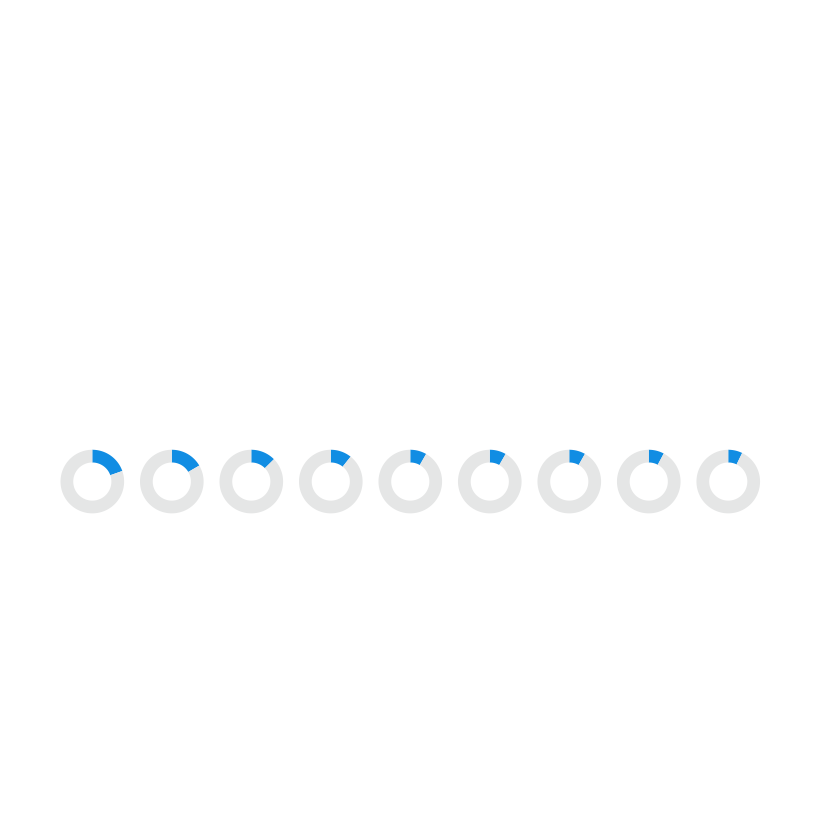

In [8]:
p1<-ggplot()+
geom_col(data=mydata1,aes(x=1,y=Percent,fill=index),width=.2)+
scale_fill_manual(values=c("percent"="#00A0E9","anti_percent"="#EAEBEB"),guide=FALSE)+
xlim(0.6,1.1)+
coord_polar(theta="y")+
facet_grid(.~label,labeller=global_labeller)+
theme_minimal()+
theme(
    line=element_blank(),
    axis.text=element_blank(),
    title=element_blank(),
    panel.spacing=unit(0,"cm"),
    strip.text=element_text(family="myfont",size=25,lineheight=1.2),
    plot.margin=unit(c(.5,3,0,2),'lines')
    );p1

In [13]:
# 堆积图

name2<-c("学术界","商人","公务员","外交领域","经济学家","工程师","司法界","医学界","军人","教育工作者","其他")
巴西<-c(1,1.7,0,0.5,1.4,0.3,2.2,2.25,0.3,1.4)
中国<-c(0.15,0,3.2,0.5,0.35,6.3,0.75,0.2,1.1,1.1)
埃及<-c(3.15,0.5,0.3,1.7,1.9,1.9,3.5,0.4,0.9,0)
印度<-c(0.6,2.1,0.35,0.4,1.9,1,4.2,0.5,0,0)
韩国<-c(2,1.6,2.1,1.7,1.75,0,1.2,0,3.2,0)
美国<-c(0,2.6,0.2,0.1,0,0,8.6,0.4,1,1.1)

colorpalette<-c("#5B8DA2","#155E7B","#E49D85","#1C98CB","#6CC5E8","#22918B","#6DB3A8","#211E1F","#E35840","#76261C","#798A94")

mydata2<-data.frame(巴西,中国,埃及,印度,韩国,美国)
mydata2<-data.frame(t(mydata2))
mydata2[,11]<-16-apply(mydata2,1,sum)
names(mydata2)<-name2
mydata2<-mydata2/16
mydata2$country<-rownames(mydata2)

coname<-c("Brazil","China","Egypt","India","Korea","United States of America")
code=countrycode(coname, "country.name", "iso2c")
mydata2$code<-code
rownames(mydata2)<-NULL

mydata2<-cbind(mydata2[,12:13],mydata2[,1:11])
mydata3<-gather(mydata2,cato,percent,-1:-2)
mydata3$cato<-factor(mydata3$cato,levels=rev(name2),order=T)

p2<-ggplot(data=mydata3,aes(x=country,y=percent,fill=cato))+
geom_bar(stat="identity",width=0.8)+
expand_limits(y =-.1)  +
scale_x_discrete(limits=rev(c("巴西","中国","埃及","印度","韩国","美国")))+
scale_fill_manual(values=rev(colorpalette),breaks=rev(levels(mydata3$cato)))+
geom_flag(y=-.08,aes(image=code),size=.1) + 
guides(fill=guide_legend(keywidth=3.5,keyheight=.2,nrow=1,title.hjust=.5,title.vjust=.5,title=NULL))+
geom_text(aes(label=ifelse(mydata3$percent!=0,percent(mydata3$percent),"")),position=position_stack(vjust=0.5),family="myfont",size=6.5,col="white")+
coord_flip()+
theme_transparent()+
theme(
text=element_text(family="myfont",size=25,lineheight=1.2),
legend.direction="horizontal",
legend.key.size=unit(.5,'cm'),
legend.position="top",
line=element_blank(),
panel.spacing=unit(1,"cm"),
title=element_blank(),
axis.text.x=element_blank(),
plot.margin=unit(c(0,0,0,2),'lines')
);p2

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warnin

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font 

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font 

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font 

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“fo

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font 

“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'myfont' not found in PostScript font database”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font 

ERROR: Error in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, : polygon edge not found


plot without title